In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()

In [2]:
dataset = pd.read_csv('dataframe.csv', index_col=0)
df = dataset.copy()
df.drop(['title', 'author'], axis = 1, inplace=True)
df.head()

,rating,votes_count,students_count,level,duration,platform,free
0,4.7,6382.0,100000.0,Intermediate,224.0,Coursera,False
1,4.6,116.0,3400.0,Beginner,48.0,Coursera,False
2,4.8,2083.0,67000.0,Beginner,22.0,Coursera,False
3,4.7,65.0,6100.0,Intermediate,14.0,Coursera,False
4,4.4,109.0,9300.0,Intermediate,13.0,Coursera,False


In [3]:
initial_size = df.shape[0]
initial_size

4683

In [4]:
df.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4683 entries, 0 to 4682
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rating          4028 non-null   float64
 1   votes_count     4028 non-null   float64
 2   students_count  3962 non-null   float64
 3   level           4683 non-null   object 
 4   duration        4024 non-null   float64
 5   platform        4683 non-null   object 
 6   free            4683 non-null   bool   
dtypes: bool(1), float64(4), object(2)
memory usage: 260.7+ KB


In [5]:
# NO DUPLICATES
dataset.duplicated().any()

False

<AxesSubplot:>

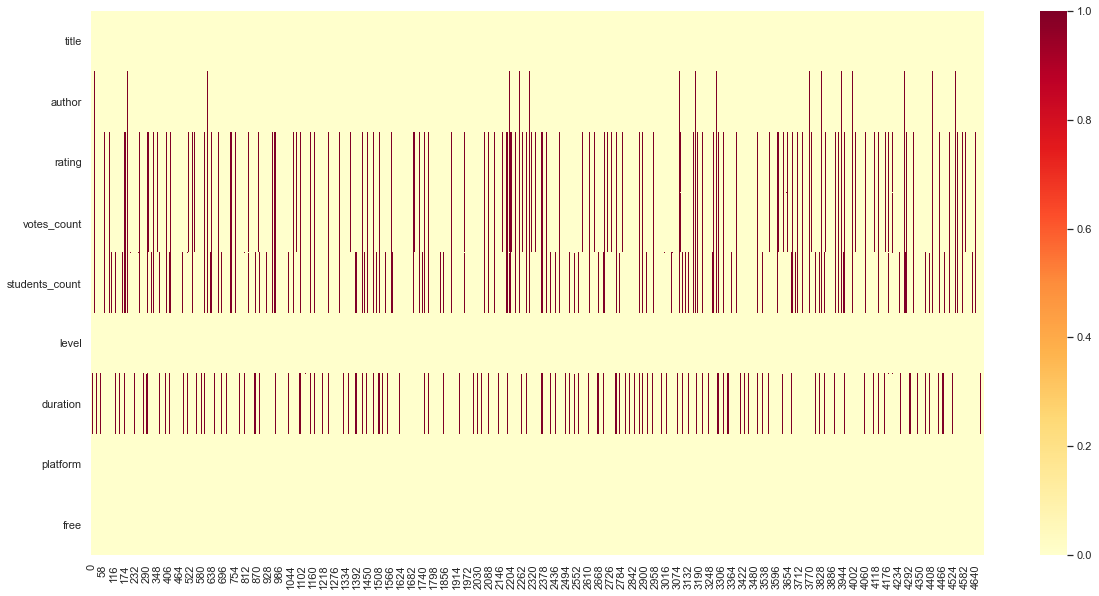

In [6]:
plt.figure(figsize=(20,10))
sns.heatmap(data=dataset.isna().transpose(),cmap="YlOrRd")

In [7]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3389 entries, 0 to 4682
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rating          3389 non-null   float64
 1   votes_count     3389 non-null   float64
 2   students_count  3389 non-null   float64
 3   level           3389 non-null   object 
 4   duration        3389 non-null   float64
 5   platform        3389 non-null   object 
 6   free            3389 non-null   bool   
dtypes: bool(1), float64(4), object(2)
memory usage: 188.6+ KB


<AxesSubplot:>

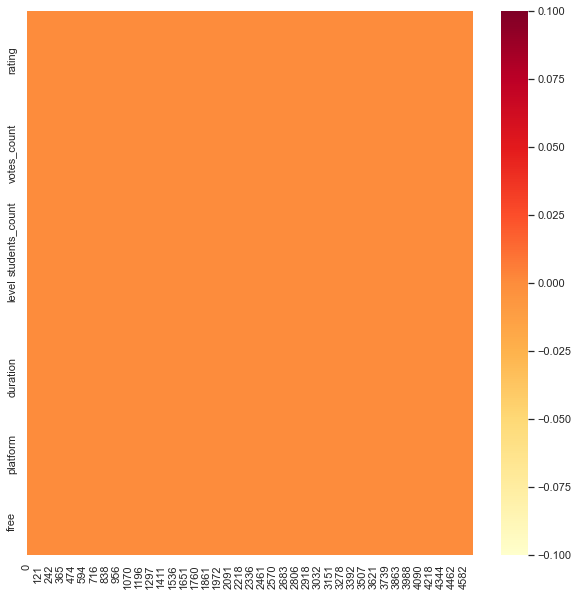

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.isna().transpose(),cmap="YlOrRd")

In [9]:
cleaned_data_percentage = df.shape[0] / initial_size * 100
cleaned_data_percentage

72.36814008114456

In [10]:
lost_rows = dataset.shape[0] - df.shape[0]
lost_rows

1294

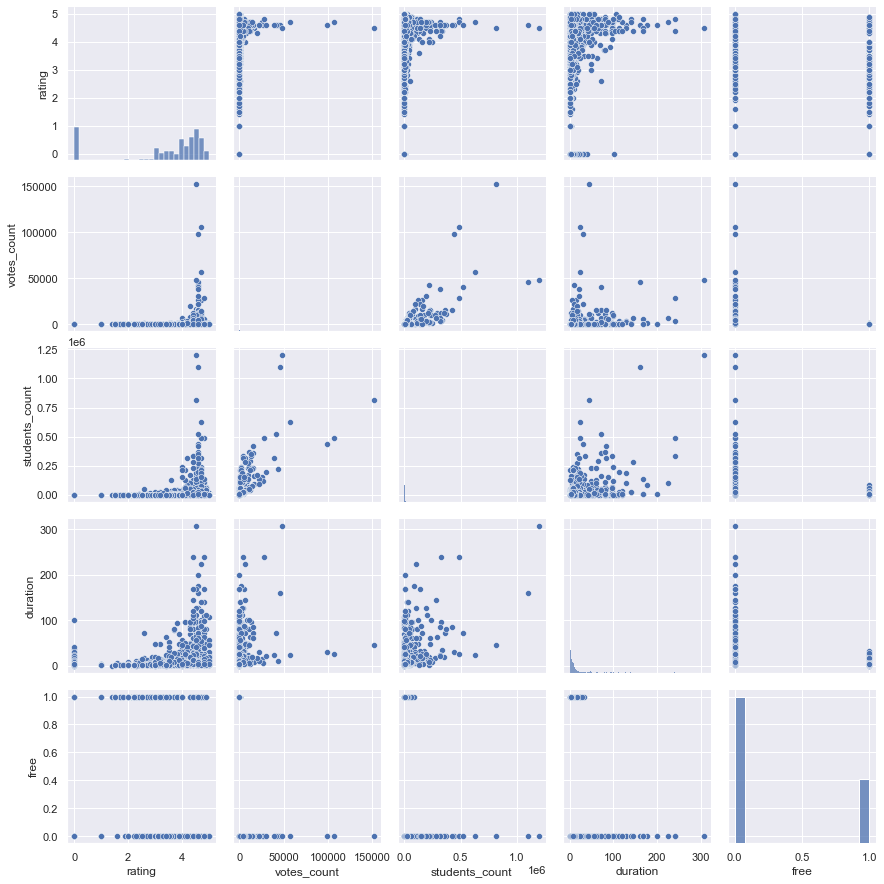

In [11]:
sns.pairplot(df);

<AxesSubplot:>

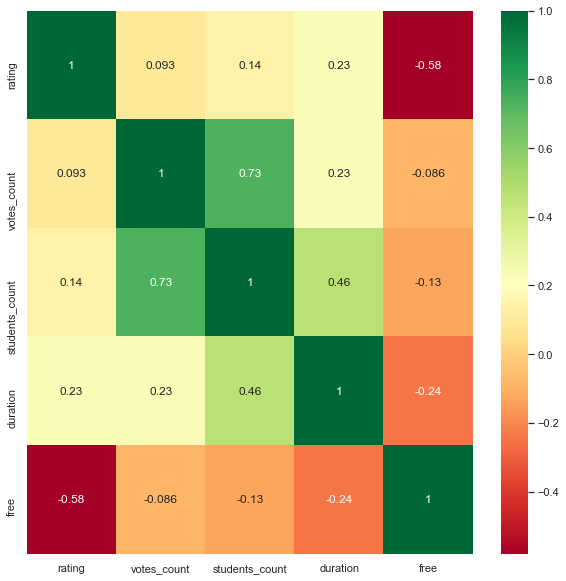

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

In [13]:
df.groupby('free').mean()

,rating,votes_count,students_count,duration
free,,,,
False,4.036476,839.256900,14125.792357,12.707006
True,2.001934,14.576402,896.213733,2.886501


# Feature Encoding

In [14]:
df = pd.get_dummies(data=df, drop_first=True)

In [15]:
df.free = df.free.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3389 entries, 0 to 4682
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rating                3389 non-null   float64
 1   votes_count           3389 non-null   float64
 2   students_count        3389 non-null   float64
 3   duration              3389 non-null   float64
 4   free                  3389 non-null   int32  
 5   level_Beginner        3389 non-null   uint8  
 6   level_Intermediate    3389 non-null   uint8  
 7   level_Mixed           3389 non-null   uint8  
 8   platform_FutureLearn  3389 non-null   uint8  
 9   platform_Skillshare   3389 non-null   uint8  
 10  platform_Stepik       3389 non-null   uint8  
 11  platform_Udemy        3389 non-null   uint8  
dtypes: float64(4), int32(1), uint8(7)
memory usage: 297.8 KB


In [16]:
df_std_scale = df.copy()
df_min_max = df.copy()

### Feature Scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
numerical_col = ['votes_count','duration', 'rating']
min_max_scaler = MinMaxScaler()
df_min_max[numerical_col] = min_max_scaler.fit_transform(df_min_max[numerical_col])
df_min_max.head()

,rating,votes_count,students_count,duration,free,level_Beginner,level_Intermediate,level_Mixed,platform_FutureLearn,platform_Skillshare,platform_Stepik,platform_Udemy
0,0.94,0.041954,100000.0,0.727273,0,0,1,0,0,0,0,0
1,0.92,0.000763,3400.0,0.155844,0,1,0,0,0,0,0,0
2,0.96,0.013693,67000.0,0.071429,0,1,0,0,0,0,0,0
3,0.94,0.000427,6100.0,0.045455,0,0,1,0,0,0,0,0
4,0.88,0.000717,9300.0,0.042208,0,0,1,0,0,0,0,0


In [18]:
target = df_min_max.students_count
features = df_min_max.drop('students_count', axis= 1)


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(features, 
                                                    target,
                                                    test_size=0.2,
                                                    random_state=123)

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
MSE_lr = mean_squared_error(Y_test, y_pred)
MAE_lr = mean_absolute_error(Y_test, y_pred)
print(f"Mean Absolute Error is: {MAE_lr}")
print(f"Mean Squared Error is: {MSE_lr}")

Mean Absolute Error is: 10246.090860391789
Mean Squared Error is: 1343222459.0094275


# Random Forest Regressor for Predicting Student Count

In [22]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=123)
rf.fit(X_train, Y_train)
y_pred = rf.predict(X_test)
y_pred

array([3.40600000e+05, 1.12804000e+03, 5.02200000e+01, 1.09770000e+02,
       2.71428000e+03, 3.73400000e+01, 4.18685500e+04, 1.80825300e+04,
       4.64570000e+02, 1.44475000e+01, 2.02923800e+04, 1.69620000e+03,
       5.06777000e+03, 6.03500000e+01, 1.27907300e+04, 1.29553000e+03,
       4.37554000e+03, 1.97838000e+03, 1.18725000e+03, 2.26201000e+03,
       6.30600000e+01, 1.48851000e+03, 3.59570000e+02, 3.62009000e+03,
       7.38700000e+01, 2.89831000e+03, 4.55990000e+02, 8.65650000e+02,
       2.27400000e+01, 8.03300000e+02, 4.97300000e+01, 1.26937750e+05,
       9.94401000e+03, 6.10903400e+04, 1.35524900e+04, 1.00590000e+02,
       1.42060000e+02, 2.76020000e+02, 2.71600000e+01, 8.15980000e+02,
       2.91200000e+01, 3.87888000e+03, 4.84356000e+03, 4.80790000e+02,
       3.28780000e+02, 3.96842000e+03, 2.20610000e+03, 4.93009000e+03,
       7.79400000e+01, 6.66189000e+03, 2.02820000e+02, 8.17000000e+01,
       2.79062200e+04, 2.35500000e+01, 5.82723000e+03, 2.33150000e+02,
      

In [23]:
MSE_rf = mean_squared_error(Y_test, y_pred)
MAE_rf = mean_absolute_error(Y_test, y_pred)
print(f"MAE for random forest is: {MAE_rf}")
print(f"MSE for random forest is: {MSE_rf}")
print('-----------------------------------------------')
print(f"MAE for linear regression is: {MAE_lr}")
print(f"MSE for linear regression is: {MSE_lr}")

MAE for random forest is: 7688.442706483823
MSE for random forest is: 1128823633.6586714
-----------------------------------------------
MAE for linear regression is: 10246.090860391789
MSE for linear regression is: 1343222459.0094275


# Predicting Course Ratings

### Feature Scaling

In [24]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
numerical_col = ['votes_count','students_count','duration']
min_max_scaler = MinMaxScaler()
df_min_max = df.copy()
df_min_max[numerical_col] = min_max_scaler.fit_transform(df_min_max[numerical_col])
df_min_max.head()

,rating,votes_count,students_count,duration,free,level_Beginner,level_Intermediate,level_Mixed,platform_FutureLearn,platform_Skillshare,platform_Stepik,platform_Udemy
0,4.7,0.041954,0.083333,0.727273,0,0,1,0,0,0,0,0
1,4.6,0.000763,0.002833,0.155844,0,1,0,0,0,0,0,0
2,4.8,0.013693,0.055833,0.071429,0,1,0,0,0,0,0,0
3,4.7,0.000427,0.005083,0.045455,0,0,1,0,0,0,0,0
4,4.4,0.000717,0.007750,0.042208,0,0,1,0,0,0,0,0


In [25]:
#target column
target_rating = df.rating

#Features
features_no_rating = df_min_max.drop('rating', axis=1)


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(features_no_rating, 
                                                    target_rating,
                                                    test_size=0.2,
                                                    random_state=123)

In [27]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train, Y_train)
prediction_min_max = model1.predict(X_test)
prediction_min_max

array([4.73702216, 3.94207983, 1.89936935, 1.93665891, 3.9249406 ,
       3.95051136, 3.97148869, 4.03608525, 3.927921  , 3.92955562,
       4.46553554, 3.96652455, 3.94210729, 3.92612511, 3.92927362,
       3.7772587 , 3.97498258, 1.94719387, 1.89914171, 3.92973428,
       1.92740266, 3.9903937 , 1.89497271, 4.63962803, 3.98479251,
       3.96428642, 1.89181621, 3.98507133, 1.93423779, 3.92972775,
       1.92828698, 4.48725816, 3.93171391, 3.99157964, 4.0593903 ,
       3.92618939, 3.9575573 , 3.9778393 , 1.93601419, 1.92673142,
       1.89616299, 3.96771018, 3.93673325, 1.93451394, 3.9296612 ,
       4.01612304, 4.00961299, 3.96749012, 1.92994451, 4.52930954,
       3.95518239, 4.12338597, 3.97610869, 1.9272595 , 3.93884488,
       1.89615685, 3.92687836, 3.93653631, 3.95302773, 1.89851203,
       3.9551136 , 4.03608787, 1.90584844, 1.9072311 , 3.98040153,
       4.60233496, 1.93194864, 1.90209105, 3.93828806, 1.90154077,
       1.92557309, 3.97132681, 3.96952993, 3.97607147, 3.98126

# Multiple Linear Regression may predict values greater than 5.0 for ratings
# not good...

In [28]:
prediction_min_max.max()

6.126877149008672

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
MSE_lr = mean_squared_error(Y_test, prediction_min_max)
MAE_lr = mean_absolute_error(Y_test, prediction_min_max)
print(f"Mean Absolute Error is: {MAE_lr}")
print(f"Mean Squared Error is: {MSE_lr}")

Mean Absolute Error is: 0.8900159625468009
Mean Squared Error is: 1.524163173224824


# Coefficients/gradients for each feature

In [30]:
dictionary = {}
for i in range(len(features_no_rating.columns)):
    dictionary[features_no_rating.columns[i]] = model1.coef_[i]

data_items = dictionary.items()
data_list = list(data_items)

coeff = pd.DataFrame(data_list)
coeff.columns = ['Feature', 'Coefficient']

coeff 

,Feature,Coefficient
0,votes_count,2.035934
1,students_count,-0.023109
2,duration,1.072947
3,free,-0.326815
4,level_Beginner,0.166762
5,level_Intermediate,0.163264
6,level_Mixed,0.197561
7,platform_FutureLearn,0.481611
8,platform_Skillshare,-2.140394
9,platform_Stepik,0.702039


# Random Forest Regressor for Course Ratings

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(features_no_rating, 
                                                    target_rating,
                                                    test_size=0.2,
                                                    random_state=123)

In [32]:
#target column
target_unscaled = df.rating

#Features
features_min_max = df_min_max.drop('rating', axis=1)
features_standard = df_std_scale.drop('rating', axis=1)

In [33]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=123)
rf.fit(X_train, Y_train)
y_pred = rf.predict(X_test)
y_pred

array([4.576     , 4.356     , 0.26      , 0.        , 4.014     ,
       4.155     , 4.384     , 4.546     , 4.131     , 0.        ,
       4.611     , 4.306     , 4.263     , 4.076     , 4.206     ,
       3.981     , 4.338     , 3.438     , 3.319     , 4.044     ,
       2.496     , 4.119     , 3.147     , 4.605     , 3.836     ,
       4.211     , 2.845     , 4.255     , 0.        , 3.967     ,
       0.4       , 4.613     , 4.334     , 4.373     , 4.594     ,
       3.799     , 4.065     , 4.309     , 0.48      , 3.737     ,
       0.09      , 4.122     , 4.288     , 3.715     , 3.708     ,
       4.106     , 4.255     , 4.565     , 3.015     , 4.594     ,
       4.146     , 4.11      , 4.398     , 0.02      , 4.302     ,
       3.256     , 3.987     , 0.04      , 4.422     , 2.527     ,
       4.399     , 4.588     , 2.72      , 0.        , 4.367     ,
       4.433     , 0.        , 3.593     , 4.376     , 0.08      ,
       3.608     , 4.366     , 4.394     , 4.376     , 4.006  

In [34]:
y_pred.max()

4.825333333333334

In [35]:
MSE_rf = mean_squared_error(Y_test, y_pred)
MAE_rf = mean_absolute_error(Y_test, y_pred)
print('Random Forest')
print(f"Mean Absolute Error is: {MAE_rf}")
print(f"Mean Squared Error is: {MSE_rf}")
print('----------------------------------------')
print('Linear Regression')
print(f"Mean Absolute Error is: {MAE_lr}")
print(f"Mean Squared Error is: {MSE_lr}")

Random Forest
Mean Absolute Error is: 0.3568222713864306
Mean Squared Error is: 0.29682916351196326
----------------------------------------
Linear Regression
Mean Absolute Error is: 0.8900159625468009
Mean Squared Error is: 1.524163173224824


# Conclusion

- Random forest is performing better than Multiple Linear Regression for prediciting both course ratings and student count
- Linear regression should not be used for predicting course ratings as it may predict values greater than 5.0